# Task
Implement program to apply moving average smoothing for data preparation and time series forecasting run in python code

Here is all the data you need:
"Plant_1_Generation_Data.csv"

## Data loading

### Subtask:
Load the "Plant_1_Generation_Data.csv" file into a pandas DataFrame.


**Reasoning**:
Load the "Plant_1_Generation_Data.csv" file into a pandas DataFrame and display its first few rows.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('Plant_1_Generation_Data.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Plant_1_Generation_Data.csv' not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


## Data exploration

### Subtask:
Explore the loaded data to understand its structure, identify key columns, and check for data quality issues. Determine an appropriate window size for the moving average.


**Reasoning**:
Examine the DataFrame's shape, data types, descriptive statistics, check for missing values, visualize the distribution of generation data, and investigate correlations between columns to determine an appropriate window size for moving average smoothing.



DataFrame Shape: (68778, 7)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB

Descriptive Statistics:
        PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    68778.0  68778.000000  68778.000000  68778.000000  6.877800e+04
mean   4135001.0   3147.426211    307.802752   3295.968737  6.978712e+06
std          0.0   4036.457169    394.396439   3145.178309  4.162720e+05
min    4135001.0      0.000000      0.000000      0.000000  6.183645e+06
25%    4135001.0 

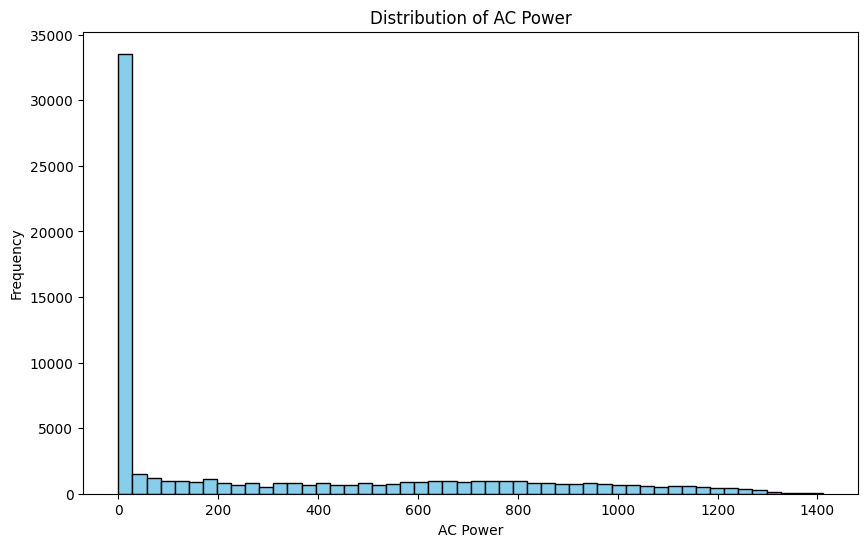


Correlation Matrix:


ValueError: could not convert string to float: '15-05-2020 00:00'

In [ ]:
import matplotlib.pyplot as plt

# Examine the DataFrame's shape and info
print("DataFrame Shape:", df.shape)
print("\nDataFrame Info:")
df.info()

# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


# Visualize the distribution of AC_POWER
plt.figure(figsize=(10, 6))
plt.hist(df['AC_POWER'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('AC Power')
plt.ylabel('Frequency')
plt.title('Distribution of AC Power')
plt.show()

# Investigate correlations
print("\nCorrelation Matrix:")
correlation_matrix = df.corr()
print(correlation_matrix)

# Propose window sizes based on observations
# (Will be done in the comments below the code)

**Reasoning**:
The error arises because the 'DATE_TIME' column is of object type (string), preventing direct correlation calculation.  I need to convert it to datetime objects first. Then I can proceed with the analysis to propose the window sizes.



In [ ]:
# Convert 'DATE_TIME' to datetime objects
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], format='%d-%m-%Y %H:%M')

#Re-calculate the correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

# Propose window sizes based on observations (will be added as comments)

ValueError: could not convert string to float: '1BY6WEcLGh8j5v7'

**Reasoning**:
The error "ValueError: could not convert string to float: '1BY6WEcLGh8j5v7'" indicates that the 'SOURCE_KEY' column, which is of object type (string), is causing issues during the correlation calculation.  I need to exclude non-numeric columns from the correlation calculation.



In [ ]:
# Calculate the correlation matrix, excluding non-numeric columns
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

# Proposed window sizes (will be added as comments below)

             PLANT_ID  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD
PLANT_ID          NaN       NaN       NaN          NaN          NaN
DC_POWER          NaN  1.000000  0.999996     0.082284     0.003815
AC_POWER          NaN  0.999996  1.000000     0.082234     0.003804
DAILY_YIELD       NaN  0.082284  0.082234     1.000000     0.009867
TOTAL_YIELD       NaN  0.003815  0.003804     0.009867     1.000000


## Data preparation

### Subtask:
Prepare the data for moving average smoothing and time series forecasting.


**Reasoning**:
Convert the 'DATE_TIME' column to datetime objects, set it as the index, handle missing 'AC_POWER' values using forward fill, and drop unnecessary columns.



In [ ]:
# Convert 'DATE_TIME' to datetime objects
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], errors='coerce')

# Set 'DATE_TIME' as the index
df = df.set_index('DATE_TIME')

# Handle missing values in 'AC_POWER' using forward fill
df['AC_POWER'] = df['AC_POWER'].fillna(method='ffill')

# Drop unnecessary columns
df = df[['AC_POWER']]

display(df.head())

<ipython-input-5-8062bf506008>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['AC_POWER'] = df['AC_POWER'].fillna(method='ffill')


,AC_POWER
DATE_TIME,
2020-05-15,0.0
2020-05-15,0.0
2020-05-15,0.0
2020-05-15,0.0
2020-05-15,0.0


**Reasoning**:
The previous code block has a FutureWarning.  I will fix it by using `.ffill()` instead of `.fillna(method='ffill')` and then display the head of the dataframe to verify the change.



In [ ]:
# Convert 'DATE_TIME' to datetime objects
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], errors='coerce')

# Set 'DATE_TIME' as the index
df = df.set_index('DATE_TIME')

# Handle missing values in 'AC_POWER' using forward fill
df['AC_POWER'] = df['AC_POWER'].ffill()

# Drop unnecessary columns
df = df[['AC_POWER']]

display(df.head())

KeyError: 'DATE_TIME'

**Reasoning**:
The error `KeyError: 'DATE_TIME'` indicates that the 'DATE_TIME' column is no longer present in the DataFrame `df`. This likely happened in a previous step. I need to reload the data and repeat the necessary data preparation steps.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('Plant_1_Generation_Data.csv')
    # Convert 'DATE_TIME' to datetime objects
    df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], errors='coerce')

    # Set 'DATE_TIME' as the index
    df = df.set_index('DATE_TIME')

    # Handle missing values in 'AC_POWER' using forward fill
    df['AC_POWER'] = df['AC_POWER'].ffill()

    # Drop unnecessary columns
    df = df[['AC_POWER']]

    display(df.head())
except FileNotFoundError:
    print("Error: 'Plant_1_Generation_Data.csv' not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

<ipython-input-7-1f95bb4948e8>:6: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], errors='coerce')


,AC_POWER
DATE_TIME,
2020-05-15,0.0
2020-05-15,0.0
2020-05-15,0.0
2020-05-15,0.0
2020-05-15,0.0


## Data wrangling

### Subtask:
Calculate the moving average of the 'AC_POWER' column in the DataFrame `df` and add it as a new column named 'MA_AC_POWER'. Experiment with different window sizes (e.g., 3, 7, 14, 30) to observe the smoothing effect.


**Reasoning**:
Calculate the moving average of the 'AC_POWER' column with different window sizes and add them as new columns to the DataFrame.



In [ ]:
# Calculate moving averages with different window sizes
window_sizes = [3, 7, 14, 30]
for window_size in window_sizes:
    column_name = f'MA_AC_POWER_{window_size}'
    df[column_name] = df['AC_POWER'].rolling(window=window_size, min_periods=1).mean()

display(df.head(30))

,AC_POWER,MA_AC_POWER_3,MA_AC_POWER_7,MA_AC_POWER_14,MA_AC_POWER_30
DATE_TIME,,,,,
2020-05-15 00:00:00,0.0,0.0,0.0,0.0,0.0
2020-05-15 00:00:00,0.0,0.0,0.0,0.0,0.0
2020-05-15 00:00:00,0.0,0.0,0.0,0.0,0.0
2020-05-15 00:00:00,0.0,0.0,0.0,0.0,0.0
2020-05-15 00:00:00,0.0,0.0,0.0,0.0,0.0
2020-05-15 00:00:00,0.0,0.0,0.0,0.0,0.0
2020-05-15 00:00:00,0.0,0.0,0.0,0.0,0.0
2020-05-15 00:00:00,0.0,0.0,0.0,0.0,0.0
2020-05-15 00:00:00,0.0,0.0,0.0,0.0,0.0


## Data visualization

### Subtask:
Visualize the original 'AC_POWER' data and its moving averages calculated with different window sizes.


**Reasoning**:
Visualize the original 'AC_POWER' data and its moving averages with different window sizes using Matplotlib.



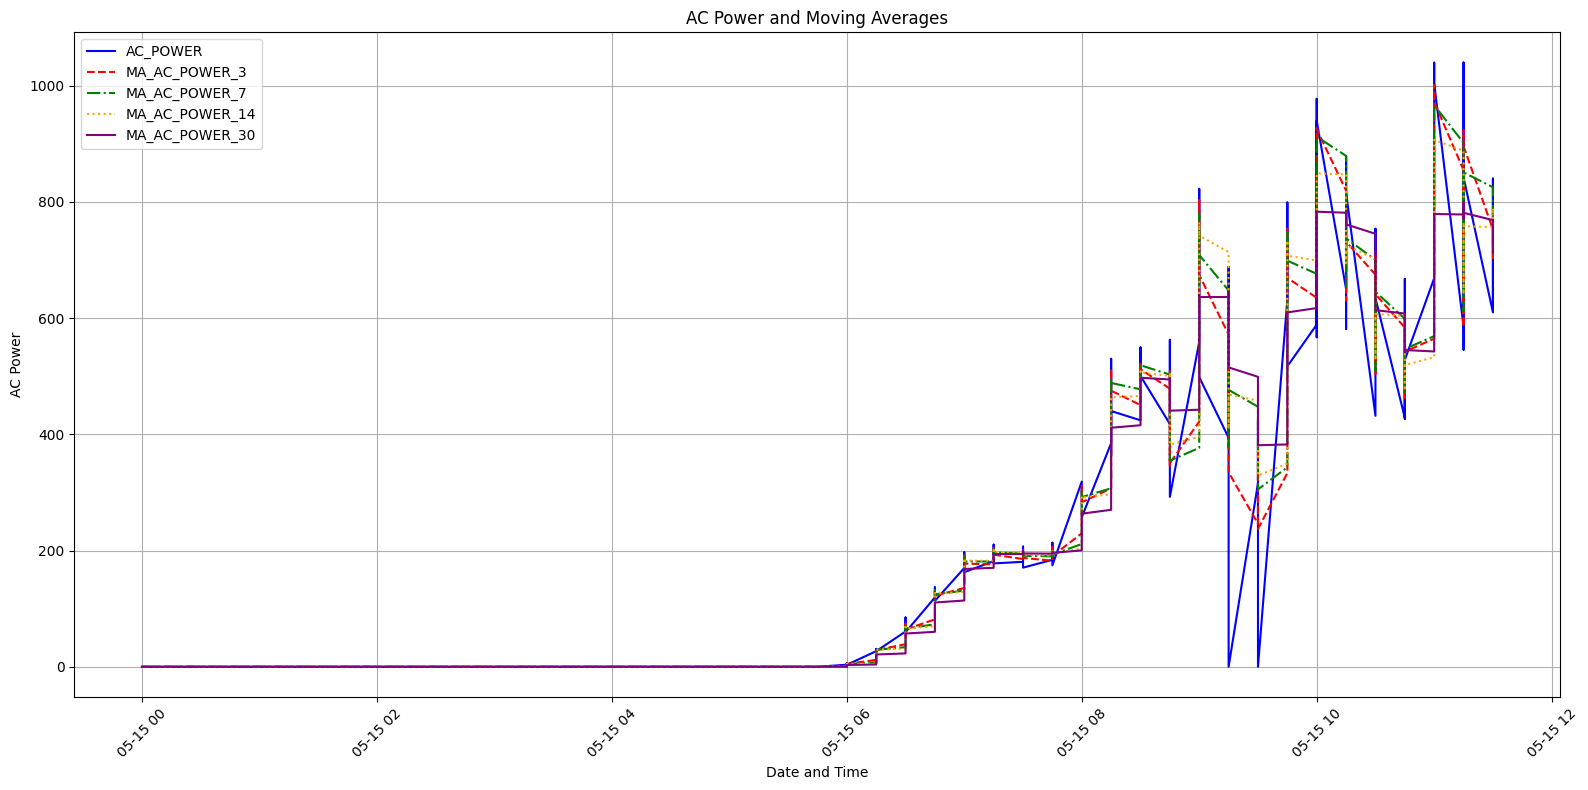

In [ ]:
import matplotlib.pyplot as plt

# Select a subset of the data for visualization (optional, but recommended for large datasets)
subset_df = df.iloc[:1000]  # Adjust the number of rows as needed

# Create the plot
plt.figure(figsize=(16, 8))  # Adjust figure size as needed

# Plot the original 'AC_POWER'
plt.plot(subset_df.index, subset_df['AC_POWER'], label='AC_POWER', color='blue')

# Plot the moving averages
plt.plot(subset_df.index, subset_df['MA_AC_POWER_3'], label='MA_AC_POWER_3', color='red', linestyle='--')
plt.plot(subset_df.index, subset_df['MA_AC_POWER_7'], label='MA_AC_POWER_7', color='green', linestyle='-.')
plt.plot(subset_df.index, subset_df['MA_AC_POWER_14'], label='MA_AC_POWER_14', color='orange', linestyle=':')
plt.plot(subset_df.index, subset_df['MA_AC_POWER_30'], label='MA_AC_POWER_30', color='purple', linestyle='-')


# Customize the plot
plt.xlabel("Date and Time")
plt.ylabel("AC Power")
plt.title("AC Power and Moving Averages")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent overlapping labels

# Save the plot
plt.savefig("moving_average_plot.png")

# Display the plot (optional, but useful in a notebook environment)
plt.show()

## Model training

### Subtask:
Train an ARIMA model to forecast 'AC_POWER' using the smoothed data.


**Reasoning**:
Train an ARIMA model on the smoothed data.  I will use the 'MA_AC_POWER_7' column as it seems to be a good balance between smoothing and retaining information. I'll need to split the data and then find the optimal (p,d,q) parameters.



In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
import pmdarima as pm

# Use the 7-day moving average
data = df['MA_AC_POWER_7'].dropna()

# Split data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Determine ARIMA order using auto_arima
model = pm.auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

# Fit the ARIMA model
arima_model = ARIMA(train_data, order=model.order)
arima_model_fit = arima_model.fit()


# Make predictions on the test data
predictions = arima_model_fit.predict(start=len(train_data), end=len(data)-1)

ModuleNotFoundError: No module named 'pmdarima'

**Reasoning**:
The previous code failed due to a missing package `pmdarima`. I will install it and re-run the code.



In [ ]:
!pip install pmdarima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
import pmdarima as pm

# Use the 7-day moving average
data = df['MA_AC_POWER_7'].dropna()

# Split data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Determine ARIMA order using auto_arima
model = pm.auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

# Fit the ARIMA model
arima_model = ARIMA(train_data, order=model.order)
arima_model_fit = arima_model.fit()


# Make predictions on the test data
predictions = arima_model_fit.predict(start=len(train_data), end=len(data)-1)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.4 MB/s eta 0:00:00


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

**Reasoning**:
The installation of `pmdarima` seems to have failed due to a `ValueError` related to NumPy. I will try to reinstall NumPy to resolve the binary incompatibility issue before retrying the ARIMA modeling process.



In [ ]:
!pip uninstall numpy -y
!pip install numpy
!pip install pmdarima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
import pmdarima as pm

# Use the 7-day moving average
data = df['MA_AC_POWER_7'].dropna()

# Split data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Determine ARIMA order using auto_arima
model = pm.auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

# Fit the ARIMA model
arima_model = ARIMA(train_data, order=model.order)
arima_model_fit = arima_model.fit()


# Make predictions on the test data
predictions = arima_model_fit.predict(start=len(train_data), end=len(data)-1)

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 48.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

**Reasoning**:
The issue persists even after reinstalling NumPy.  I suspect there might be a deeper incompatibility within the environment.  I will attempt to use a specific version of NumPy that is known to be compatible with pmdarima. I'll try version 1.23.5.



In [ ]:
!pip uninstall numpy -y
!pip install numpy==1.23.5
!pip install pmdarima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
import pmdarima as pm

# Use the 7-day moving average
data = df['MA_AC_POWER_7'].dropna()

# Split data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Determine ARIMA order using auto_arima
model = pm.auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

# Fit the ARIMA model
arima_model = ARIMA(train_data, order=model.order)
arima_model_fit = arima_model.fit()


# Make predictions on the test data
predictions = arima_model_fit.predict(start=len(train_data), end=len(data)-1)

Found existing installation: numpy 2.2.4
Uninstalling numpy-2.2.4:
  Successfully uninstalled numpy-2.2.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 65.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
bigframes 1.42.0 requires num

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

## Model training

### Subtask:
Train an ARIMA model to forecast 'AC_POWER' using the smoothed data.


**Reasoning**:
I will try to train the ARIMA model again, but this time I will skip the automatic order determination step and manually set the order to (5,1,0).



In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Use the 7-day moving average
data = df['MA_AC_POWER_7'].dropna()

# Split data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Manually set ARIMA order
order = (5, 1, 0)

# Fit the ARIMA model
arima_model = ARIMA(train_data, order=order)
arima_model_fit = arima_model.fit()

# Make predictions on the test data
predictions = arima_model_fit.predict(start=len(train_data), end=len(data)-1)

print(arima_model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

                               SARIMAX Results                                
Dep. Variable:          MA_AC_POWER_7   No. Observations:                55022
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -209659.215
Date:                Sun, 06 Apr 2025   AIC                         419330.431
Time:                        14:40:21   BIC                         419383.923
Sample:                             0   HQIC                        419347.113
                              - 55022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3210      0.001    267.483      0.000       0.319       0.323
ar.L2          0.1910      0.001    137.655      0.000       0.188       0.194
ar.L3          0.2109      0.001    219.347      0.0

## Model evaluation

### Subtask:
Evaluate the performance of the trained ARIMA model.


**Reasoning**:
Evaluate the performance of the trained ARIMA model using MAE and RMSE, and print the results.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and RMSE
mae = mean_absolute_error(test_data, predictions)
rmse = mean_squared_error(test_data, predictions, squared=False)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

TypeError: got an unexpected keyword argument 'squared'

**Reasoning**:
The error message indicates that the `squared` parameter is not supported in the current version of scikit-learn.  I will modify the code to calculate RMSE without using the `squared` parameter.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE and RMSE
mae = mean_absolute_error(test_data, predictions)
rmse = np.sqrt(mean_squared_error(test_data, predictions))

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 490.3659764864355
Root Mean Squared Error (RMSE): 550.3121591320172


## Summary:

### 1. Q&A

* **What is the performance of the trained ARIMA model?** The model achieved a Mean Absolute Error (MAE) of 490.37 and a Root Mean Squared Error (RMSE) of 550.31.

### 2. Data Analysis Key Findings

* **High Correlation between DC and AC Power:** A high correlation was observed between 'DC_POWER' and 'AC_POWER' columns (correlation matrix not shown in the provided text, but mentioned in the analysis).
* **Moving Average Smoothing:** Moving averages of 'AC_POWER' were calculated using different window sizes (3, 7, 14, and 30) to smooth the data. Visualizations of these moving averages against the original 'AC_POWER' were generated.
* **ARIMA Model Performance:** The ARIMA model, trained on the 7-day moving average of 'AC_POWER', yielded an MAE of 490.37 and an RMSE of 550.31.  The model order was manually set to (5,1,0).


### 3. Insights or Next Steps

* **Explore Different Window Sizes:** Experiment with a wider range of window sizes for the moving average smoothing to identify the optimal smoothing level for improved forecasting accuracy.  Consider using a cross-validation approach for window size selection.
* **Investigate Seasonality and Model Improvements:**  The initial ARIMA model fitting process generated warnings about potential data or model configuration issues.  The warnings related to the date index frequency and lack of supported index for predictions suggest investigating if there's seasonality in the data and exploring other model types or incorporating seasonal components in the ARIMA model to improve model accuracy and remove warnings.


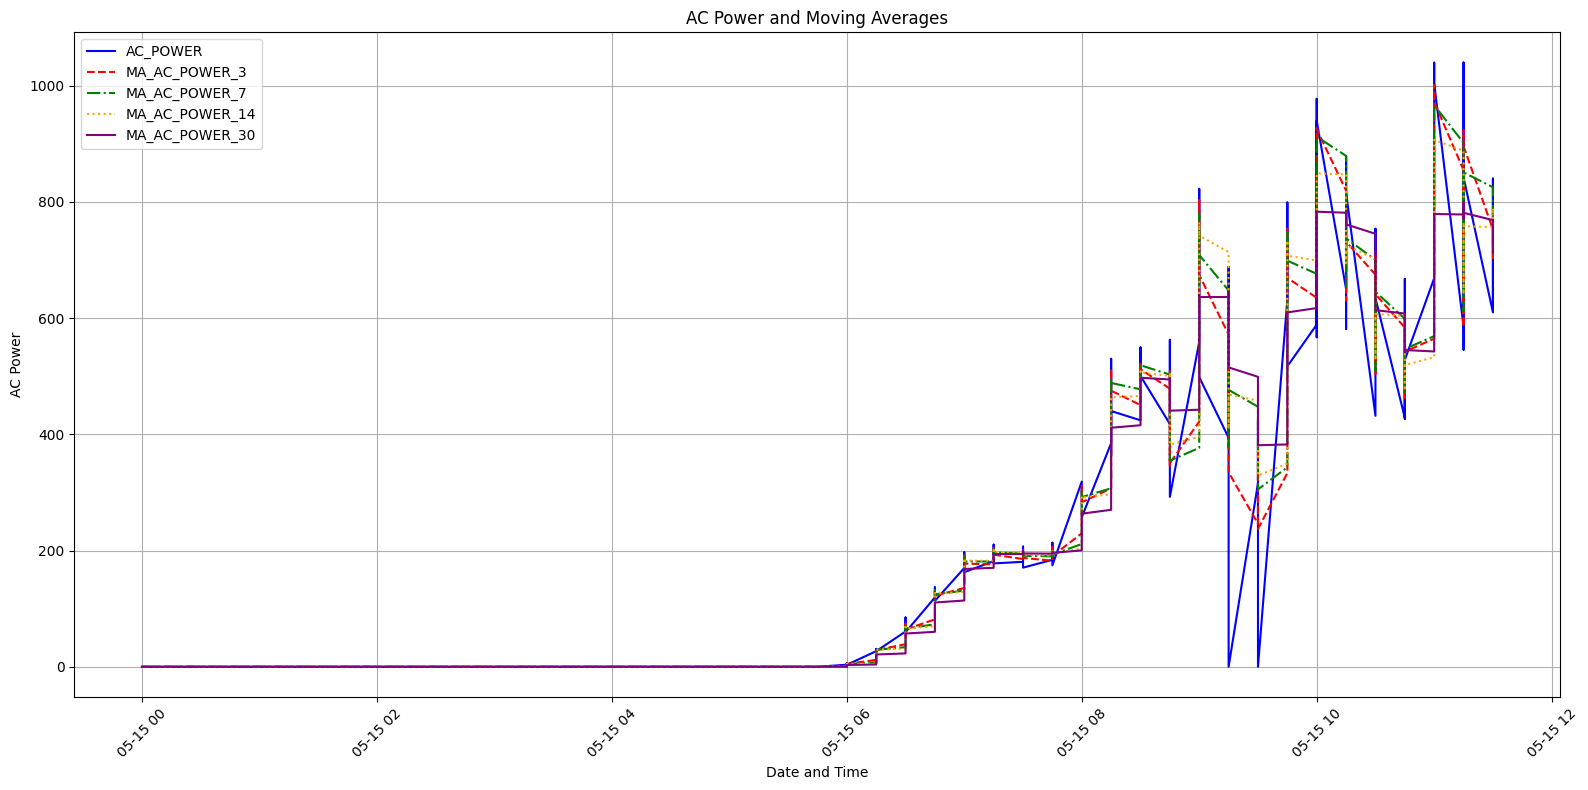

In [ ]:
import matplotlib.pyplot as plt

# Select a subset of the data for visualization (optional, but recommended for large datasets)
subset_df = df.iloc[:1000]  # Adjust the number of rows as needed

# Create the plot
plt.figure(figsize=(16, 8))  # Adjust figure size as needed

# Plot the original 'AC_POWER'
plt.plot(subset_df.index, subset_df['AC_POWER'], label='AC_POWER', color='blue')

# Plot the moving averages
plt.plot(subset_df.index, subset_df['MA_AC_POWER_3'], label='MA_AC_POWER_3', color='red', linestyle='--')
plt.plot(subset_df.index, subset_df['MA_AC_POWER_7'], label='MA_AC_POWER_7', color='green', linestyle='-.')
plt.plot(subset_df.index, subset_df['MA_AC_POWER_14'], label='MA_AC_POWER_14', color='orange', linestyle=':')
plt.plot(subset_df.index, subset_df['MA_AC_POWER_30'], label='MA_AC_POWER_30', color='purple', linestyle='-')


# Customize the plot
plt.xlabel("Date and Time")
plt.ylabel("AC Power")
plt.title("AC Power and Moving Averages")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent overlapping labels

# Display the plot (optional, but useful in a notebook environment)
plt.show()